In [1]:
import sys
sys.path.append('./models/')
from Arima import ARIMA_Model
from SIRD  import *
from SIRCD  import SIRCD_Model
from exponential_regression import ExponentialRegression, MultiDimensionalExponentialRegression
from moving_average import MovingAverage
from Truth import Truth
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from evaluate_model import evaluate_model

df = pd.read_csv('deaths_and_infections.csv')

# remove a columns from a df: 
df.drop(columns=['Unnamed: 0'], inplace=True)
new_deaths=np.array(df['new_deaths'])
death_cumul=np.array([sum(new_deaths[:i]) for i in range(len(new_deaths))])
dates_of_pandemic=np.arange(len(new_deaths))

c:\Users\grego\Documents\code\covid_internship\./models\SIRD.py:222: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(len(vars)==reach, str(len(vars)) + 'different from ' + str(reach))


In [2]:
# importing mobility from the csv file
df_mobility=pd.read_csv('mobility.csv')
df_mobility.drop(columns=['Unnamed: 0'], inplace=True)
mobility=np.array(df_mobility['mobility'])

df = pd.read_csv('deaths_and_infections.csv')

In [3]:
relier_les_points=[]
for i in range(len(mobility)): 
    if i + 7 < len(mobility): 
        if i % 7 ==0:
            relier_les_points.append(mobility[i])
        else: 
            decalage=i-7*(i//7)
            res = (1-decalage/7)*mobility[7*(i//7)] + (decalage/7)*mobility[7*(i//7)+7]

            relier_les_points.append(res)
    else:
        relier_les_points.append(mobility[i])
mobility_smoothed=np.array(relier_les_points)

In [4]:


# remove a columns from a df: 
df.drop(columns=['Unnamed: 0'], inplace=True)
new_deaths=np.array(df['new_deaths'])
n_infected=np.array(df['n_infected'])
death_cumul=np.array([sum(new_deaths[:i]) for i in range(len(new_deaths))])
dates_of_pandemic=np.arange(len(new_deaths))
mob_shifted=np.concatenate((np.array([ 0 for i in range(17)]), mobility))
mob_17_days_ahead=(np.array([mob_shifted[i-17] for i in range(17, len(mob_shifted))]))


split = 35
reach=7
deaths_train=new_deaths[:split]
infected_train=n_infected[:split]
mob_train=mobility_smoothed[:split]
data_train=np.array([deaths_train, infected_train, mob_train])
dates_of_pandemic_train=dates_of_pandemic[:split]


data =np.array([ new_deaths, n_infected, mob_17_days_ahead ])

In [5]:
mysir = Multi_SIRD_model()
mysir.choose_model(True, True)
mysir.train(dates_of_pandemic_train,   data_train)

test
16301732083221.26


In [6]:
a, b, d = mysir.a, mysir.b, mysir.d

In [7]:
a, b, d ,shift1, shift2 = mysir.a, mysir.b, mysir.d, mysir.shift1, mysir.shift2

In [10]:
print(a,b,d, shift1, shift2)

1.0 1.0 0.0005523 5.0 10.0


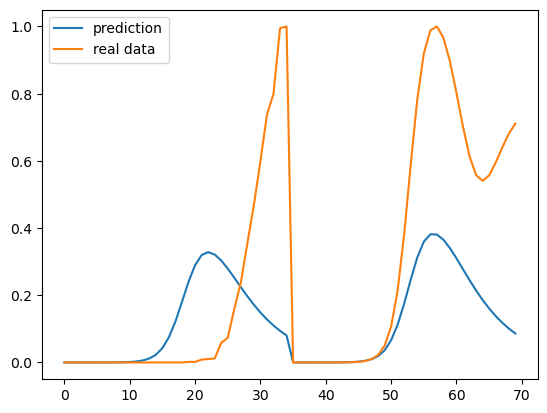

In [9]:
res=(sir_for_optim_normalized(dates_of_pandemic_train, a, b, d, data_train[2], data_train[0], data_train[1], ))
deads=res[:len(res)//2]
infected=res[len(res)//2:]
plt.plot(np.concatenate((shift(deads, 0), shift(infected, 0))), label = 'prediction')
plt.plot(np.concatenate((data_train[0]/max(data_train[0]), data_train[1]/max(data_train[1]))), label= 'real data')
plt.legend()
plt.show()

In [10]:
res=(sir_for_optim_normalized(dates_of_pandemic_train, a, b, d, data_train[2], data_train[0], data_train[1], shift1, 10))
deads=res[:len(res)//2]
infected=res[len(res)//2:]
plt.plot(np.concatenate((shift(deads, shift1), shift(infected, shift2))), label = 'prediction')
plt.plot(np.concatenate((data_train[0]/max(data_train[0]), data_train[1]/max(data_train[1]))), label= 'real data')
plt.legend()
plt.show()

NameError: name 'shift1' is not defined

In [114]:
from scipy.optimize import minimize, curve_fit
x_test=np.arange(-5, 5, 0.01)

def f(x, a, b): 
    return a*(x-b)**2

y=f(x_test, 1, 2)+np.random.normal(1, 10, len(x_test))

def obj(param): 
    a=param[0]
    b=param[1]
    return np.sum((f(x_test, a, b)-y)**2)

res=minimize(obj, [0, 0])
hess_inv=res.hess_inv


p, cov=curve_fit(f, x_test, y)


print('results for minimize: ', res.x)
print('results for curve_fit: ', p)

std=np.sqrt(np.diag(cov))
print('std for curve_fit: ', std)
print('std for minimize: ', np.sqrt(np.diag(hess_inv)))
# print(std)
# print((np.sqrt(np.diag((hess_inv)))))

results for minimize:  [0.99304899 2.17833842]
results for curve_fit:  [0.99307352 2.17826505]
std for curve_fit:  [0.0388999  0.10630663]
std for minimize:  [0.00304098 0.00838669]


gamma constant
delta-method
[118.26793155 107.49171845  93.22458371  77.89327823  63.18856102
  50.07332176  38.94896794]


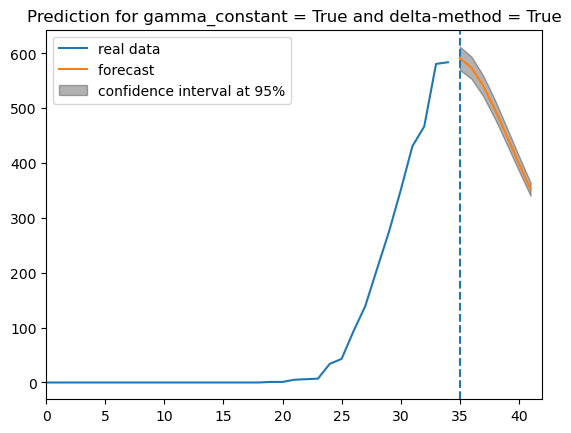

gamma constant
sampling parameters


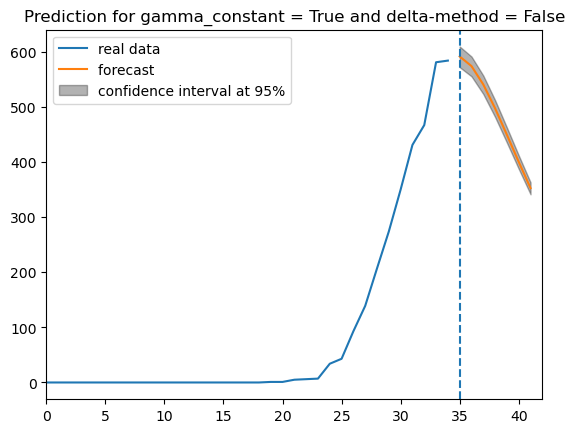

gamma not constant 
delta-method
[42684.22551355 31653.84121947 20999.96252667 12007.68468701
  5346.22452507  1341.71457073   149.22448688]


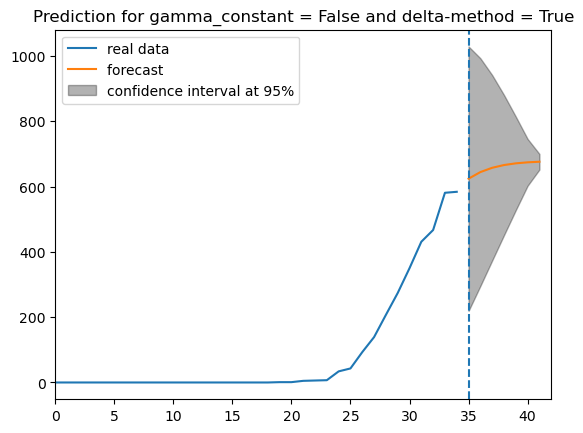

gamma not constant 
sampling parameters


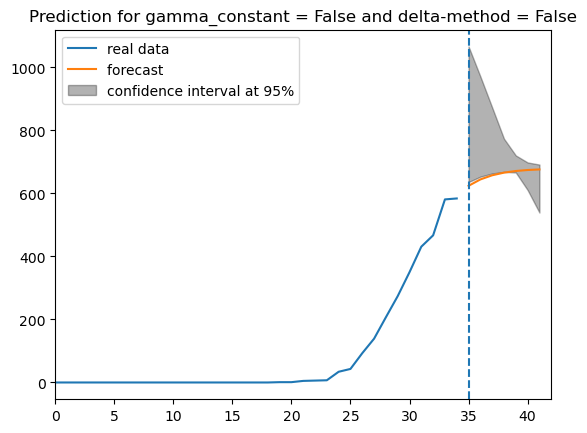

In [8]:
for bol1 in [True, False]: 
    for bol2 in [True, False]: 
        sir_model=SIRD_model_2()
        sir_model.choose_model(bol1, bol2)
        sir_model.train(dates_of_pandemic_train, new_deaths[:split])
        sir_model.plot(7, 0.05, title='Prediction for gamma_constant = ' + str(bol1) + ' and delta-method = ' + str(bol2))
        plt.show()


In [6]:
sir_model_m= Multi_SIRD_model()
sir_model_m.train(dates_of_pandemic_train, data_train)

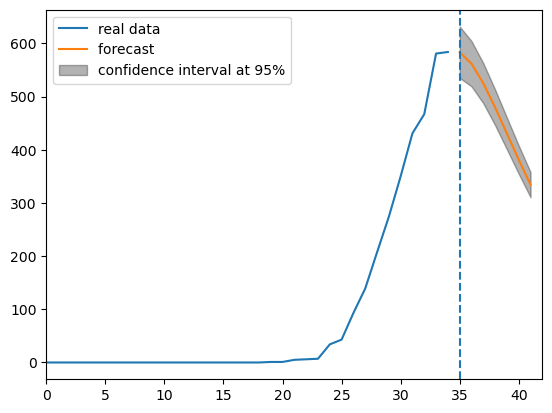

In [7]:
sir_model_m.plot(7, 0.05)

In [10]:
# curve = lambda x, a, b, d :   sir_for_optim_normalized(x, a, b, d, data_train[2], data_train[0], data_train[1], False) 
curve = lambda x, a, b, d, n : (n-int(n))*  sir_for_optim_normalized(x, a, b, d, shift(data_train[2], int(n)), data_train[0], data_train[1], False) + (1-(n-int(n))) * sir_for_optim_normalized(x, a, b, d, shift(data_train[2], int(n)+1), data_train[0], data_train[1], False)

obj=np.array(data_train[0])
# p,cov= curve_fit(curve,np.array([i for i in range(len(dates_of_pandemic_train))]),obj, p0=[ 1, 1 , 5.523e-04],  bounds=([-np.inf, -np.inf, 0], [np.inf,np.inf, np.inf]))
p,cov= curve_fit(curve,np.array([i for i in range(len(dates_of_pandemic_train))]),obj, p0=[ 1, 1 , 5.523e-04, 1],  bounds=([-np.inf, -np.inf, 0, 0], [np.inf,np.inf, np.inf, np.inf]))


In [11]:
from scipy.optimize import minimize
curve = lambda x, a, b, d, n :  sir_for_optim_normalized(x, a, b, d, shift(data_train[2], n), data_train[0], data_train[1], False) 
def constraint1(vars): 
    a,b,d,n=vars
    return d 
def constraint2(vars): 
    a,b,d,n=vars
    return n%1
def objective_function(vars):
    a, b, d, n = vars
    return np.sum(np.array((curve([i for i in range(len(data_train[0]))], a, b, d, n ) - obj)**2))

constraints=({'type':  'ineq', 'fun' : constraint1 }, {'type' : 'eq', 'fun' : constraint2})
minimize(objective_function, [1, 1, 2, 2], constraints=constraints)


 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 1353979.0
       x: [ 1.000e+00 -2.987e+00 -5.898e-17  2.000e+00]
     nit: 7
     jac: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00]
    nfev: 35
    njev: 7

In [31]:
losses=[]
n_optis=[]
a_optis=[]
b_optis=[]
d_optis=[]
for shift_delay_initial in range(25): 
    p,cov= curve_fit(curve,np.array([i for i in range(len(dates_of_pandemic_train))]),obj, p0=[ 1, 1 , 5.523e-04, shift_delay_initial],  bounds=([-np.inf, -np.inf, 0, 0], [np.inf,np.inf, np.inf, np.inf]))
    a_optis.append(p[0])
    b_optis.append(p[1])
    d_optis.append(p[2])
    n_optis.append(p[3])
    losses.append(np.sum((curve ( [i for i in range(len(dates_of_pandemic_train))],p[0], p[1], p[2], p[3]) - obj )**2))

plt.plot(losses)
plt.title('loss at the optimum')
plt.xlabel('n_initial')
plt.show()

plt.plot(n_optis, 'o')
plt.title('n optis found')
plt.xlabel('n_initial')
plt.show()


array([-4.54150896e-02,  6.23756312e-01,  1.81370086e-03,  1.99997435e+00])

In [32]:
a=p[0]
b=p[1]
d=p[2]


In [34]:
loss= [ np.sum((curve ( [i for i in range(len(dates_of_pandemic_train))], a,b,d, n) - obj )**2) for n in range(20)]

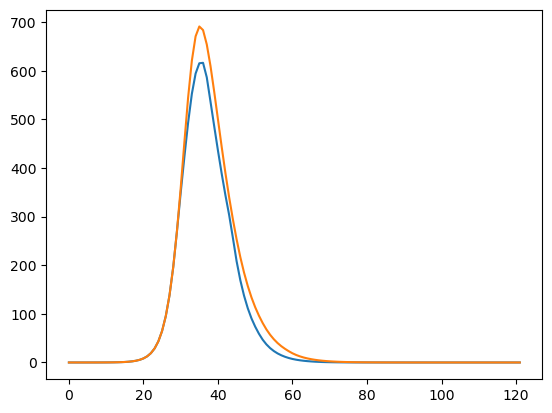

In [10]:
plt.plot(sir_for_optim_normalized([i for i in range(len(dates_of_pandemic_train))], sir_model_m.a, sir_model_m.b, sir_model_m.d, shift(data[2], 5), data_train[0], data_train[1], False) )
plt.plot(sir_for_optim_normalized([i for i in range(len(dates_of_pandemic_train))], sir_model_m.a, sir_model_m.b, sir_model_m.d, shift(data[2], 20), data_train[0], data_train[1], False) )
                         

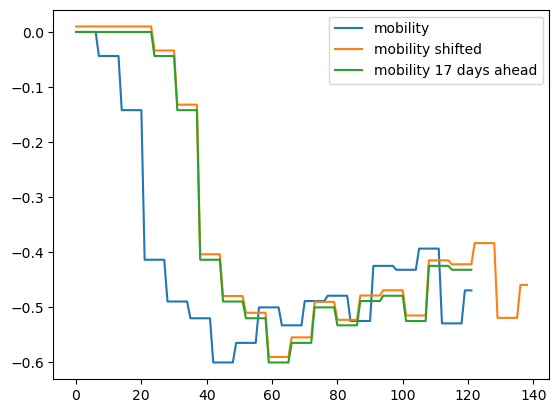

In [19]:
plt.plot(mobility, label='mobility')
plt.plot(mob_shifted+0.01, label='mobility shifted')
plt.plot(mob_17_days_ahead, label='mobility 17 days ahead')
plt.legend()

c:\Users\grego\Miniconda3\envs\env_qcm\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


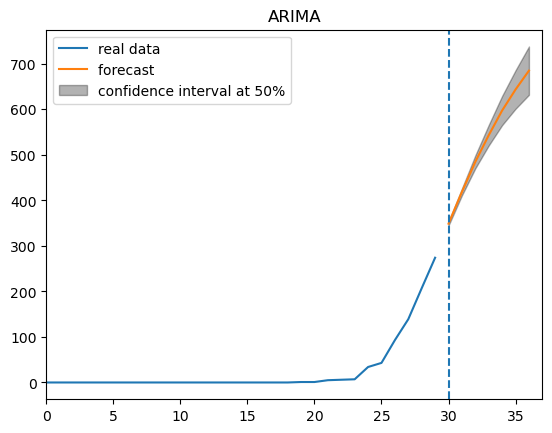

delta-method
[ 37070.1717655   56992.97514632  80567.09537463 104344.68952583
 123903.82933175 135545.12161569 137699.97788291]


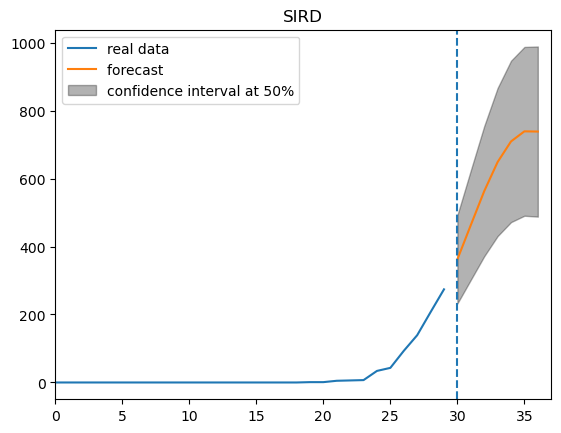

covariance method


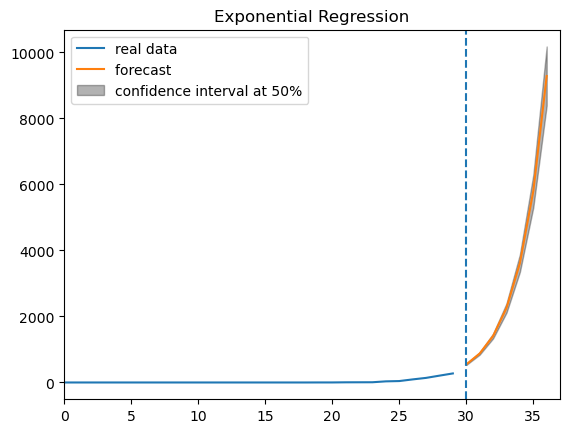

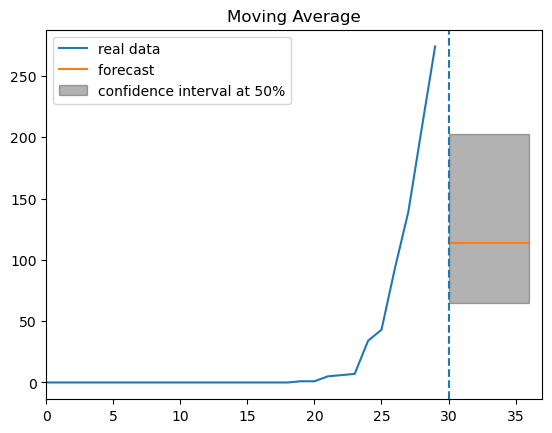

In [7]:
myarima=ARIMA_Model()
mySIRD=SIRD_model_2()
myexp=ExponentialRegression()
mymoving=MovingAverage()
split=30
reach=7
alpha=0.5
myarima.train(dates_of_pandemic[:split], new_deaths[:split])
mySIRD.train(dates_of_pandemic[:split], new_deaths[:split])
myexp.train(dates_of_pandemic[:split], new_deaths[:split])
mymoving.train(dates_of_pandemic[:split], new_deaths[:split])
myarima.plot(reach, alpha, title='ARIMA')
mySIRD.plot(reach, alpha, title='SIRD')
myexp.plot(reach, alpha, title='Exponential Regression')
mymoving.plot(reach, alpha, title='Moving Average')


Comparison between SIRD2 with delta method and with samplings : 

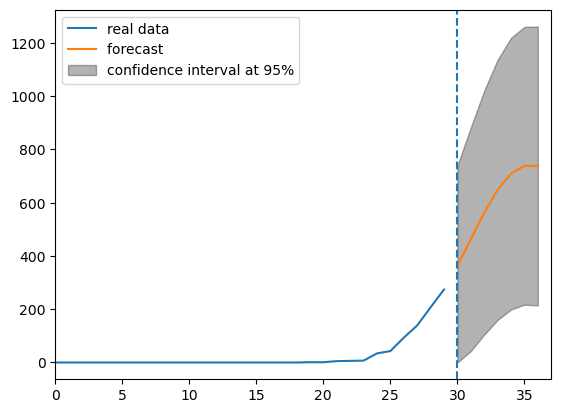

In [9]:
mysird2=SIRD_model_2()
mysird2.train(dates_of_pandemic[:30], new_deaths[:30])
mysird2.plot(7,0.05)

# multivariate sampling with intervals based on delta method

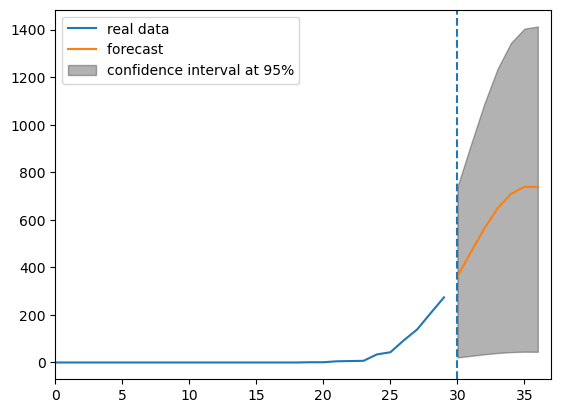

In [2]:
mysird2=SIRD_model_2()
mysird2.train(dates_of_pandemic[:30], new_deaths[:30])
mysird2.plot(7,0.05)

# multivariate sampling with intervals based on sampling the parameters

**Evaluating models**

In [1]:
import sys
sys.path.append('./models/')
from Arima import ARIMA_Model
from SIR  import *
from exponential_regression import ExponentialRegression
from moving_average import MovingAverage
from Truth import Truth
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from evaluate_model import evaluate_model

df = pd.read_csv('deaths_and_infections.csv')

# remove a columns from a df: 
df.drop(columns=['Unnamed: 0'], inplace=True)
new_deaths=np.array(df['new_deaths'])
death_cumul=np.array([sum(new_deaths[:i]) for i in range(len(new_deaths))])
dates_of_pandemic=np.arange(len(new_deaths))

In [2]:
myarima=ARIMA_Model()
mysir=SIRD_model_2()
myexp=ExponentialRegression()
mymoving=MovingAverage()
truth=Truth()
alphas=[0.05,0.1,0.5]
index_points=[30]
reach=7
weights=[1,1,1,1]


In [3]:
evaluate_model(model=mysir, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)

30
dispersion for alpha =  0.05
the interval is:  (119.55199357531978, 1344.3420434676)

dispersion for alpha =  0.1
the interval is:  (128.156831174565, 1294.709062378066)

dispersion for alpha =  0.5
the interval is:  (600.6900296423914, 992.5617279053904)



814.6925704854245

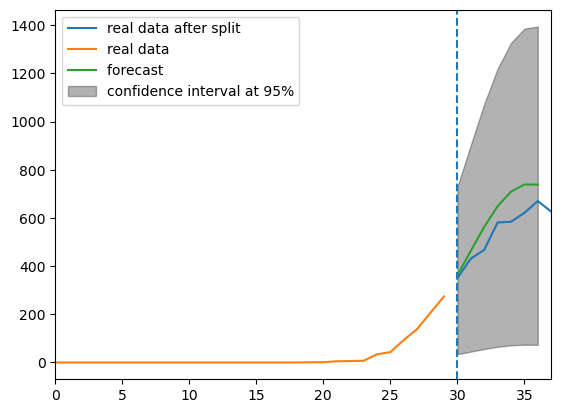

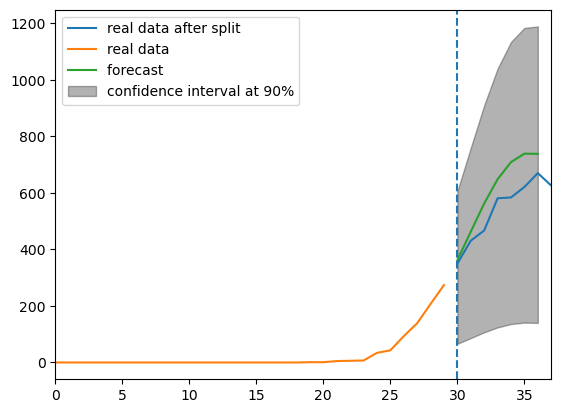

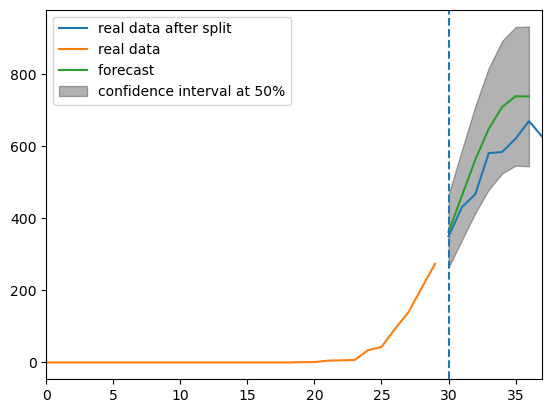

In [11]:
mysir.train(dates_of_pandemic[:30], new_deaths[:30])
plt.plot(dates_of_pandemic[30:], new_deaths[30:], label='real data after split')
mysir.plot(reach,0.05)

plt.plot(dates_of_pandemic[30:], new_deaths[30:], label='real data after split')
mysir.plot(reach,0.1)


plt.plot(dates_of_pandemic[30:], new_deaths[30:], label='real data after split')
mysir.plot(reach,0.5)

In [6]:
evaluate_model(model=truth, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)

30


0.0

In [4]:
evaluate_model(model=truth, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)

30


0.0

In [7]:
evaluate_model(model=myarima, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)

30


c:\Users\grego\Miniconda3\envs\env_qcm\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\grego\Miniconda3\envs\env_qcm\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\grego\Miniconda3\envs\env_qcm\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


196.74120170056491

In [5]:
evaluate_model(model=myarima, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)

30


c:\Users\grego\Miniconda3\envs\env_qcm\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\grego\Miniconda3\envs\env_qcm\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\grego\Miniconda3\envs\env_qcm\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


196.74120170056491

In [8]:
evaluate_model(model=mysir, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)

30


780.8320488975481

In [6]:
evaluate_model(model=mysir, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)

30


837.716952036619

In [9]:
evaluate_model(model=myexp, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)

30
covariance method
covariance method
covariance method
underprediction
point 670.0
l 6683.697282067345
underprediction
point 670.0
l 7101.858602213807
underprediction
point 670.0
l 8389.561878080918


120010.14049179564

In [7]:
evaluate_model(model=myexp, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)

30
covariance method
covariance method
covariance method


120010.14049179564

In [10]:
evaluate_model(model=mymoving, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)

30


7505.162207609593

In [8]:
evaluate_model(model=mymoving, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)

30


7092.687903440425